# HackRF

In [1]:
!hackrf_info

hackrf_info version: 2024.02.1
libhackrf version: 2024.02.1 (0.9)
Found HackRF
Index: 0
Serial number: 0000000000000000f77c60dc292134c3
Board ID Number: 2 (HackRF One)
Firmware Version: 2024.02.1 (API:1.08)
Part ID Number: 0xa000cb3c 0x00614758
Hardware Revision: older than r6
Hardware supported by installed firmware:
    HackRF One


In [30]:
!hackrf_sweep -f 88:106 -N 10 -w 100000 -r ./data/n10f88-106.csv

call hackrf_sample_rate_set(20.000 MHz)
call hackrf_baseband_filter_bandwidth_set(15.000 MHz)
Sweeping from 88 MHz to 108 MHz
Stop with Ctrl-C

Exiting...
Total sweeps: 10 in 0.05010 seconds (199.62 sweeps/second)
hackrf_close() done
hackrf_exit() done
fclose() done
exit


In [1]:
import pandas as pd
import numpy as np


def parse_csv(csv_path):
  raw = open(csv_path)
  data = {
    'Date': [],
    'Time': [],
    'Frequency': [],
    'db': []
  }
  for i in raw:
    raw_row = i.split(',')
    date = raw_row[0].strip()
    time = raw_row[1].strip()
    hzLow = float(raw_row[2].strip())
    hzHigh = float(raw_row[3].strip())
    hzBinWidth = float(raw_row[4].strip())
    numSamples = raw_row[5].strip()
    db_list = list(map(lambda x: float(x), raw_row[6:]))

    for j in range(len(db_list)):
      frequency = hzLow + hzBinWidth * j
      data['Date'].append(date)
      data['Time'].append(time)
      data['Frequency'].append(frequency)
      data['db'].append(db_list[j])

  return data


In [3]:
file_path = './data/n50f88-106.csv'

data = parse_csv(file_path)
df = pd.DataFrame(data)
df = df.sort_values(by='Frequency')
df = df.groupby(['Frequency'], as_index=False)['db'].mean()


## Frequency Domain

<Axes: xlabel='Frequency'>

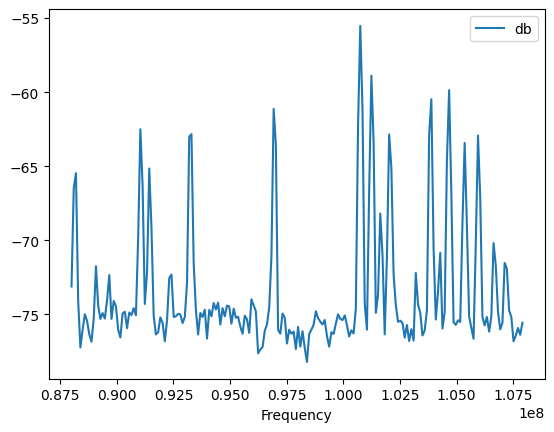

In [4]:
df.plot(x = 'Frequency', y = 'db')

## Top Frequencies with most RSSI

In [5]:
df.nlargest(20, 'db').sort_values(by='Frequency')['Frequency'].apply(lambda x: x / 10e5)

2       88.196078
31      91.039216
35      91.431373
53      93.196078
54      93.294118
91      96.921569
92      97.019608
129    100.647059
130    100.745098
131    100.843137
135    101.235294
136    101.333333
143    102.019608
144    102.117647
161    103.784314
162    103.882353
169    104.568628
170    104.666667
177    105.352941
183    105.941177
Name: Frequency, dtype: float64